In [1]:
# Import Packages
import pandas as pd 
import numpy as np 
from scipy.io import loadmat 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from sklearn.metrics import classification_report

# Question 1

In [2]:
# Load the Dataset DataA.mat
mat_dataA = loadmat('Dataset/DataA.mat')
    
#r'C:\Users\tonkh\OneDrive\Desktop\ECE 657A\Assignment\Assignment2\Assignment2\Datasets\DataA.mat')
    

In [3]:
# DataA.mat
print("Dataset A: \n", mat_dataA)

Dataset A: 
 {'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Oct 21 15:46:48 2014', '__version__': '1.0', '__globals__': [], 'fea': array([[1, 2, 1, ..., 2, 2, 1],
       [3, 3, 4, ..., 1, 3, 4],
       [4, 1, 4, ..., 2, 4, 4],
       ...,
       [3, 4, 4, ..., 3, 1, 2],
       [1, 4, 3, ..., 4, 3, 4],
       [4, 3, 1, ..., 2, 4, 3]], dtype=uint8), 'gnd': array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]], dtype=int16)}


In [4]:
# Get the Features from the matrix 
mat_features_datA = mat_dataA['fea']

In [5]:
# Get the Labels from the Matrix 
mat_label_dataA = mat_dataA['gnd']

In [6]:
# Convert the Feature Matrix data into Pandas Dataframe
df_features_dataA = pd.DataFrame(mat_features_datA)
print("Features from the Dataset: \n", df_features_dataA)

Features from the Dataset: 
       0   1   2   3   4   5   6   7   8   9   ...  47  48  49  50  51  52  53  \
0      1   2   1   2   1   2   3   3   3   3  ...   4   3   2   3   4   2   2   
1      3   3   4   2   1   2   2   4   3   2  ...   3   1   4   3   4   4   4   
2      4   1   4   4   4   4   1   1   2   1  ...   1   1   2   1   1   4   2   
3      1   4   1   1   3   3   4   4   3   4  ...   2   1   3   3   4   1   3   
4      3   4   4   3   1   1   4   4   4   1  ...   4   3   1   3   2   1   4   
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..   
2195   3   3   3   4   2   2   3   3   4   4  ...   2   1   4   3   3   4   1   
2196   3   3   1   1   2   3   3   4   3   1  ...   4   2   1   3   1   2   3   
2197   3   4   4   3   3   3   1   2   4   3  ...   2   4   3   3   4   1   2   
2198   1   4   3   4   1   3   4   2   4   3  ...   4   2   4   2   2   2   4   
2199   4   3   1   2   2   3   3   3   3   4  ...   3   4   3   3   4   3   4   

In [7]:
# Statistical Description of the Dataset
print(df_features_dataA.describe())

0            1            2            3            4   \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean      2.493182     2.529545     2.506818     2.526818     2.547727   
std       1.103943     1.086542     1.098160     1.118780     1.081699   
min       1.000000     1.000000     1.000000     1.000000     1.000000   
25%       2.000000     2.000000     2.000000     2.000000     2.000000   
50%       3.000000     3.000000     3.000000     3.000000     3.000000   
75%       3.000000     3.000000     3.000000     4.000000     3.000000   
max       4.000000     4.000000     4.000000     4.000000     4.000000   

                5            6            7            8           9   ...  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.00000  ...   
mean      2.492727     2.550000     2.541364     2.553182     2.56500  ...   
std       1.099399     1.109818     1.103600     1.126751     1.10822  ...   
min       1.000000     1.000000     1

## Check For Missing Values in the Dataset  

In [8]:
# Number of Missing Values in the Dataset 
print("Total Number of Missing Values in the Dataset: ",df_features_dataA.isna().sum().sum())


Total Number of Missing Values in the Dataset:  0


#### There are no missing values in the dataset

In [9]:
# Convert the Labels to Dataframe and Check for Unique Values 
df_label_dataA = pd.DataFrame(mat_label_dataA)
print("Number of Unique Lables in the Dataset: ", df_label_dataA[0].unique())

Number of Unique Lables in the Dataset:  [ 1 -1]


#### There are two unique labels in the data set -1 and 1

## Question 1.1: - Z-Score Normalization

In [10]:
# Z-Score Normalization
ss = StandardScaler()
ss.fit(df_features_dataA)
z_standardized_dataA = ss.transform(df_features_dataA)

In [11]:
# Standardised Dataset 
print("Standardised DataA: \n",z_standardized_dataA)

Standardised DataA: 
 [[-1.35289759 -0.48747864 -1.37244139 ... -0.4584159  -0.41756618
  -1.39224875]
 [ 0.45920268  0.43308188  1.36002111 ... -1.37441497  0.49741947
   1.36965138]
 [ 1.36525282 -1.40803915  1.36002111 ... -0.4584159   1.41240513
   1.36965138]
 ...
 [ 0.45920268  1.35364239  1.36002111 ...  0.45758317 -1.33255183
  -0.47161537]
 [-1.35289759  1.35364239  0.44920027 ...  1.37358225  0.49741947
   1.36965138]
 [ 1.36525282  0.43308188 -1.37244139 ... -0.4584159   1.41240513
   0.44901801]]


In [12]:
# Convert Labels to numpy array
np_label_dataA = df_label_dataA.to_numpy()
print("converted array is :",np_label_dataA)

converted array is : [[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]]


### Randomnly spliting the data 70% of samples for taining and other 30% for testing
### using hold-out scheme

In [13]:
# Split the Dataset using Train Test Split 
x_train_dataA, x_test_dataA, y_train_dataA, y_test_dataA = train_test_split(z_standardized_dataA,np_label_dataA.ravel(),test_size = 0.3, random_state = 42)

print(" \n Features for Train Dataset: \n", x_train_dataA)
print(" \n Labels for the Train Dataset: \n", y_train_dataA)


 Features for Train Dataset: 
 [[ 1.36525282 -0.48747864  0.44920027 ...  1.37358225  1.41240513
   1.36965138]
 [-0.44684745 -0.48747864 -1.37244139 ...  1.37358225 -1.33255183
   1.36965138]
 [-0.44684745  1.35364239 -1.37244139 ...  0.45758317 -1.33255183
   0.44901801]
 ...
 [ 1.36525282 -0.48747864 -0.46162056 ... -0.4584159  -0.41756618
   0.44901801]
 [ 0.45920268  0.43308188  0.44920027 ... -1.37441497  0.49741947
   0.44901801]
 [-0.44684745  1.35364239 -0.46162056 ... -1.37441497 -0.41756618
  -0.47161537]]
 
 Labels for the Train Dataset: 
 [ 1  1 -1 ... -1 -1  1]


#### The hold out method is kind of cross validation method where the dataset is split into training and test set. Later the model is trained on only traning set and then output values are predicted using the same model for the Test set. 

#### Advantages:
Easier to compute

#### Disadvantage:
1. Sometimes evaluation has higher variance
2. It depends on what datapoints are in test set and what in training set so it depends on split heavily.

## Question 1.2: 5-fold Cross Validation on Training set to select the Parameters k for k_NN from given set and plot

In [14]:
# Create a list for k from 1 to 31 
k_list=list(range(1,32,2))
print("Set of parameters for k value is: \n",k_list)

Set of parameters for k value is: 
 [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31]


In [15]:
# empty list to store accuracy
K_accuracy=[]

# looping through given values of k
for k in k_list:
    # 2. KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors = k)
    # 3. cross_val_score for KNeighborsClassifier with k neighbours
    accuracy = cross_val_score(knn, x_train_dataA, y_train_dataA, cv=5, scoring = 'accuracy')
    print("For k: {0}, Accuracies: {1}".format(k, accuracy))
    #4. append mean of scores for k neighbours to k_accuracy list
    K_accuracy.append(accuracy.mean())

print("Mean of accuracy scores: \n", K_accuracy)


For k: 1, Accuracies: [0.69805195 0.69805195 0.69155844 0.72077922 0.72402597]
For k: 3, Accuracies: [0.7012987  0.73376623 0.70779221 0.73701299 0.71753247]
For k: 5, Accuracies: [0.72727273 0.73376623 0.75324675 0.72402597 0.71103896]
For k: 7, Accuracies: [0.73701299 0.74675325 0.73376623 0.73051948 0.7012987 ]
For k: 9, Accuracies: [0.74675325 0.75324675 0.73701299 0.72402597 0.69805195]
For k: 11, Accuracies: [0.75649351 0.76298701 0.71103896 0.73051948 0.69805195]
For k: 13, Accuracies: [0.73701299 0.77272727 0.71103896 0.74350649 0.71428571]
For k: 15, Accuracies: [0.72727273 0.75324675 0.73376623 0.75324675 0.72077922]
For k: 17, Accuracies: [0.72077922 0.75       0.72727273 0.76298701 0.71428571]
For k: 19, Accuracies: [0.72077922 0.73701299 0.72077922 0.75       0.70454545]
For k: 21, Accuracies: [0.71103896 0.75       0.70779221 0.75974026 0.69805195]
For k: 23, Accuracies: [0.68831169 0.75       0.71103896 0.76623377 0.71103896]
For k: 25, Accuracies: [0.69155844 0.75974026

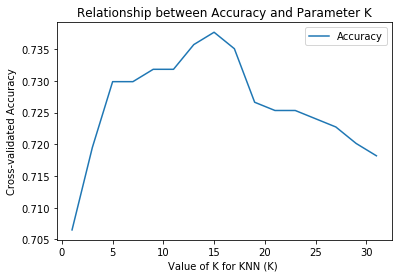

In [16]:
plt.plot(k_list, K_accuracy, label = 'Accuracy')
plt.xlabel('Value of K for KNN (K) ')
plt.ylabel('Cross-validated Accuracy')
plt.title('Relationship between Accuracy and Parameter K')
plt.legend(loc = 'best')
plt.show()

In [17]:
# Get the Maximum Value of Accuracy Score 
print('The best Calculation accuracy is :' , max(K_accuracy))


The best Calculation accuracy is : 0.7376623376623377


#### The Best Calculation accuracy of 0.7376623376623377 ie. 73.77% is best for value of K = 15

#### Hence the Best K in term of Classification Accuracy is 15. 

## Question 1.3: RBF Kernel best parameter selection in terms of classification accuracy

In [18]:
# Dicitionary of Parameters C and Gamma
c = [0.1, 0.5, 1, 2, 5, 10, 20, 50]
gamma = [0.01, 0.05 , 0.1, 0.5, 1, 2, 5, 10]
param_dict = dict(C = c, gamma = gamma)
print("Dicitionary of Parameters C and Gamma: \n ",param_dict)

Dicitionary of Parameters C and Gamma: 
  {'C': [0.1, 0.5, 1, 2, 5, 10, 20, 50], 'gamma': [0.01, 0.05, 0.1, 0.5, 1, 2, 5, 10]}


In [19]:
# Data fitted with best parameters 
clf = svm.SVC(kernel = 'rbf')
search = GridSearchCV(clf, param_dict, cv = 5, scoring = 'accuracy').fit(x_train_dataA, y_train_dataA)

In [20]:
# Best Score for the Search 
print(" Best Score from Grid Search: ",search.best_score_)
    

Best Score from Grid Search:  0.9045454545454547


In [21]:
# Best Parameters from the Grid Search 
print("Best Parameters from the Grid Search: \n", search.best_params_)
           

Best Parameters from the Grid Search: 
 {'C': 10, 'gamma': 0.01}


#### The best parameters are : The best Soft Margin penality 'c' is 10 and gamma is 0.01

## Question 1.4:  

In [22]:
# Feature Test set and Label Test Set 
print("Feature Test Set: \n",x_test_dataA)
print("Label Test Set: \n",y_test_dataA)

Feature Test Set: 
 [[ 1.36525282 -0.48747864 -0.46162056 ... -1.37441497 -0.41756618
   0.44901801]
 [-1.35289759  1.35364239 -1.37244139 ...  1.37358225  0.49741947
  -1.39224875]
 [ 0.45920268  0.43308188  1.36002111 ...  1.37358225  1.41240513
   0.44901801]
 ...
 [ 1.36525282 -1.40803915  1.36002111 ...  1.37358225 -0.41756618
   1.36965138]
 [ 0.45920268  1.35364239  0.44920027 ...  1.37358225  1.41240513
   0.44901801]
 [ 1.36525282  1.35364239  0.44920027 ...  0.45758317  1.41240513
   0.44901801]]
Label Test Set: 
 [-1  1  1 -1  1 -1  1 -1 -1 -1 -1 -1  1  1  1 -1  1  1  1 -1 -1  1 -1 -1
 -1  1  1  1  1 -1  1 -1 -1  1 -1 -1 -1  1 -1 -1  1 -1  1 -1  1  1 -1 -1
  1 -1  1  1  1 -1  1 -1  1  1  1 -1  1  1 -1 -1 -1  1 -1 -1  1  1  1 -1
 -1 -1  1  1  1  1 -1  1  1  1  1 -1 -1  1  1 -1 -1 -1 -1  1  1  1 -1 -1
  1  1 -1  1  1 -1  1  1  1 -1  1 -1 -1  1 -1  1 -1  1  1 -1  1 -1  1 -1
  1 -1 -1  1  1  1 -1 -1  1 -1  1 -1 -1 -1 -1  1  1  1  1  1  1  1  1 -1
  1  1  1  1  1  1 -1 -1 -1  1 -

### KNN Classifier

In [23]:
# For K-NN using above parameters to classify the test set 
# k = 15 gave best classification accuracy

Knn_model = KNeighborsClassifier(n_neighbors = 15)
Knn_model.fit(x_train_dataA,y_train_dataA)

y_pred_KNN = Knn_model.predict(x_test_dataA)

# comparison between actual and predicted response
print("Accuracy is :",metrics.accuracy_score(y_test_dataA, y_pred_KNN))
print("Precision is :",metrics.precision_score(y_test_dataA, y_pred_KNN))
print("Recall is :",metrics.recall_score(y_test_dataA, y_pred_KNN))
print("F1-Score is :",metrics.f1_score(y_test_dataA, y_pred_KNN))

Accuracy is : 0.75
Precision is : 0.9202127659574468
Recall is : 0.5356037151702786
F1-Score is : 0.6771037181996086


In [24]:
# Classification Report for Each Class for KNN
print("Classification Report for KNN: \n", classification_report(y_test_dataA, y_pred_KNN))

Classification Report for KNN: 
               precision    recall  f1-score   support

          -1       0.68      0.96      0.80       337
           1       0.92      0.54      0.68       323

    accuracy                           0.75       660
   macro avg       0.80      0.75      0.74       660
weighted avg       0.80      0.75      0.74       660



### SVM Classifier 

In [25]:
# For SVM using above parameters to classify the test set
SVN_model = SVC(C = 10,gamma = 0.01)
SVN_model.fit(x_train_dataA,y_train_dataA)

y_pred_SVN = SVN_model.predict(x_test_dataA)

# comparison between actual and predicted response
print("Accuracy is :",metrics.accuracy_score(y_test_dataA, y_pred_SVN))
print("Precision is :",metrics.precision_score(y_test_dataA, y_pred_SVN))
print("Recall is :",metrics.recall_score(y_test_dataA, y_pred_SVN))
print("F1-Score is :",metrics.f1_score(y_test_dataA, y_pred_SVN))

Accuracy is : 0.9075757575757576
Precision is : 0.9145569620253164
Recall is : 0.8947368421052632
F1-Score is : 0.9045383411580594


In [26]:
# Classification Report for Each Class for SVM
print("Classification Report for SVM: \n", classification_report(y_test_dataA, y_pred_SVN))

Classification Report for SVM: 
               precision    recall  f1-score   support

          -1       0.90      0.92      0.91       337
           1       0.91      0.89      0.90       323

    accuracy                           0.91       660
   macro avg       0.91      0.91      0.91       660
weighted avg       0.91      0.91      0.91       660



### Gaussian Naive Bayes 

In [27]:
# Using default setups for Naive Bayes Classifier to classify test set
NB_model = GaussianNB()
NB_model.fit(x_train_dataA,y_train_dataA)

y_pred_NB = NB_model.predict(x_test_dataA)

# comparison between actual and predicted response
print("Accuracy is :",metrics.accuracy_score(y_test_dataA, y_pred_NB))
print("Precision is :",metrics.precision_score(y_test_dataA, y_pred_NB))
print("Recall is :",metrics.recall_score(y_test_dataA, y_pred_NB))
print("F1-Score is :",metrics.f1_score(y_test_dataA, y_pred_NB))

Accuracy is : 0.8818181818181818
Precision is : 0.8792569659442725
Recall is : 0.8792569659442725
F1-Score is : 0.8792569659442725


In [28]:
# Classification Report for Each Class for Gaussian Naive Bayes
print("Classification Report for  Gaussian Naive Bayes: \n", classification_report(y_test_dataA, y_pred_NB))

Classification Report for  Gaussian Naive Bayes: 
               precision    recall  f1-score   support

          -1       0.88      0.88      0.88       337
           1       0.88      0.88      0.88       323

    accuracy                           0.88       660
   macro avg       0.88      0.88      0.88       660
weighted avg       0.88      0.88      0.88       660



### Decision Tree

In [29]:
# Using default setups for Decision Trees to classify test set
DT_model = DecisionTreeClassifier()
DT_model.fit(x_train_dataA,y_train_dataA)

y_pred_DT = DT_model.predict(x_test_dataA)

# comparison between actual and predicted response
print("Accuracy is :",metrics.accuracy_score(y_test_dataA, y_pred_DT))
print("Precision is :",metrics.precision_score(y_test_dataA, y_pred_DT))
print("Recall is :",metrics.recall_score(y_test_dataA, y_pred_DT))
print("F1-Score is :",metrics.f1_score(y_test_dataA, y_pred_DT))

Accuracy is : 0.9333333333333333
Precision is : 0.926605504587156
Recall is : 0.9380804953560371
F1-Score is : 0.9323076923076923


In [30]:
# Classification Report for Each Class for Decision Trees
print("Classification Report for Decision Trees: \n", classification_report(y_test_dataA, y_pred_DT))

Classification Report for Decision Trees: 
               precision    recall  f1-score   support

          -1       0.94      0.93      0.93       337
           1       0.93      0.94      0.93       323

    accuracy                           0.93       660
   macro avg       0.93      0.93      0.93       660
weighted avg       0.93      0.93      0.93       660



### KNN Classifier with 20 Iterations

In [31]:
# Repeating above steps 20 times by varying the split of training-test set as in Step 1

# for KNN
Knn_model2 = KNeighborsClassifier(n_neighbors=15)
# Classification based on KNN
random_seed_iterations = range(1,42,2)
KNN_accuracy_list=[] 
KNN_precision_list=[]
KNN_recall_list=[]
KNN_f1_list=[]

# Iteration for Retraining
for i in random_seed_iterations:

    # Random Dataset Split
    x_train_dataA_KNN, x_test_dataA_KNN, y_train_dataA_KNN, y_test_dataA_KNN = train_test_split(z_standardized_dataA,np_label_dataA.ravel(),test_size =0.3, random_state = i)

    # Training the Model
    Knn_model2.fit(x_train_dataA_KNN, y_train_dataA_KNN)

    # Test Dataset Prediction
    y_predict_KNN_list = Knn_model2.predict(x_test_dataA_KNN)
    
    # Classification Accuracy
    accuracy = metrics.accuracy_score(y_test_dataA_KNN, y_predict_KNN_list)
    KNN_accuracy_list.append(accuracy)
    
    # Precision
    precision = metrics.precision_score(y_test_dataA_KNN, y_predict_KNN_list)
    KNN_precision_list.append(precision)
                                    
    # Recall
    recall = metrics.recall_score(y_test_dataA_KNN, y_predict_KNN_list)
    KNN_recall_list.append(recall)
    
    # F1-score
    f1score = metrics.f1_score(y_test_dataA_KNN, y_predict_KNN_list)
    KNN_f1_list.append(f1score)

    data_KNN = pd.concat([data_KNN, knn_result], ignore_index=True)


print("Acuracy list is :",KNN_accuracy_list)
print("\n")
print("Precision list is :",KNN_precision_list)
print("\n")
print("Recall list is:",KNN_recall_list)
print("\n")
print("F1-Score list is:",KNN_f1_list)

# Average and standard Deviation of Classification values

mean_accuracy_list_KNN = sum(KNN_accuracy_list)/len(KNN_accuracy_list)
variance_accuracy_list_KNN = sum([((x-mean_accuracy_list_KNN)**2) for x in KNN_accuracy_list])/len(KNN_accuracy_list)
sd_accuracy_list_KNN = variance_accuracy_list_KNN**0.5

print("\n Mean for accuracy in case of KNN is: ",mean_accuracy_list_KNN)
print("\n Standard Deviation for accuracy in case of KNN is: ",sd_accuracy_list_KNN)

Acuracy list is : [0.7818181818181819, 0.7545454545454545, 0.7227272727272728, 0.759090909090909, 0.7575757575757576, 0.7378787878787879, 0.7803030303030303, 0.75, 0.7272727272727273, 0.7757575757575758, 0.7151515151515152, 0.7045454545454546, 0.7166666666666667, 0.7681818181818182, 0.7439393939393939, 0.7484848484848485, 0.7424242424242424, 0.7242424242424242, 0.7333333333333333, 0.746969696969697, 0.7378787878787879]


Precision list is : [0.9748743718592965, 0.9572192513368984, 0.9714285714285714, 0.9637305699481865, 0.9575471698113207, 0.9521276595744681, 0.9660194174757282, 0.9651741293532339, 0.9421052631578948, 0.9690721649484536, 0.9828571428571429, 0.9378531073446328, 0.9662921348314607, 0.9635416666666666, 0.9896907216494846, 0.9567567567567568, 0.9646464646464646, 0.9651162790697675, 0.9606741573033708, 0.9646464646464646, 0.9779005524861878]


Recall list is: [0.5825825825825826, 0.5375375375375375, 0.4885057471264368, 0.5502958579881657, 0.5734463276836158, 0.5218658892128

### SVM Classifier with 20 Iterations

In [32]:
# For SVM
SVM_model2 = SVC(C = 10,gamma = 0.01)

# Classification based on SVM
SVM_accuracy_list=[]
SVM_precision_list=[]
SVM_recall_list=[]
SVM_f1_list=[]

# Iteration for Retraining
for i in random_seed_iterations:
    # Random Dataset Split
    x_train_dataA_SVM, x_test_dataA_SVM, y_train_dataA_SVM, y_test_dataA_SVM = train_test_split(z_standardized_dataA, np_label_dataA.ravel(), test_size =0.3, random_state = i)
    # Training the Model
    SVM_model2.fit(x_train_dataA_SVM, y_train_dataA_SVM)

    # Test Dataset Prediction
    y_predict_SVM_list = SVM_model2.predict(x_test_dataA_SVM)

    # Classification Accuracy
    accuracy = metrics.accuracy_score(y_test_dataA_SVM, y_predict_SVM_list)
    SVM_accuracy_list.append(accuracy)
    
    #Precision
    precision = metrics.precision_score(y_test_dataA_SVM, y_predict_SVM_list)
    SVM_precision_list.append(precision)
                                    
    #Recall
    recall = metrics.recall_score(y_test_dataA_SVM, y_predict_SVM_list)
    SVM_recall_list.append(recall)
    
    #F1-score
    f1score = metrics.f1_score(y_test_dataA_SVM, y_predict_SVM_list)
    SVM_f1_list.append(f1score)

print("Acuracy list is :",SVM_accuracy_list)
print("\n")
print("Precision list is :",SVM_precision_list)
print("\n")
print("Recall list is:",SVM_recall_list)
print("\n")
print("F1-Score list is:",SVM_f1_list)
print("\n")

#Average and standard Deviation of Classification values
mean_accuracy_list_SVM = sum(SVM_accuracy_list)/len(SVM_accuracy_list)
variance_accuracy_list_SVM = sum([((x-mean_accuracy_list_SVM)**2) for x in SVM_accuracy_list])/len(SVM_accuracy_list)
sd_accuracy_list_SVM = variance_accuracy_list_SVM**0.5

print("mean for accuracy in case of SVM is: ",mean_accuracy_list_SVM)
print("\n")
print("Standard Deviation for accuracy in case of SVM is: ",sd_accuracy_list_SVM)

Acuracy list is : [0.9227272727272727, 0.9121212121212121, 0.9121212121212121, 0.9075757575757576, 0.9, 0.8742424242424243, 0.8939393939393939, 0.9181818181818182, 0.906060606060606, 0.9136363636363637, 0.8893939393939394, 0.8893939393939394, 0.9090909090909091, 0.9166666666666666, 0.9196969696969697, 0.9136363636363637, 0.9075757575757576, 0.9, 0.8954545454545455, 0.9045454545454545, 0.9106060606060606]


Precision list is : [0.937888198757764, 0.8962536023054755, 0.9289940828402367, 0.9287925696594427, 0.9022346368715084, 0.8846153846153846, 0.8985074626865671, 0.9408284023668639, 0.9255952380952381, 0.9174311926605505, 0.9303030303030303, 0.9134328358208955, 0.9347181008902077, 0.9394904458598726, 0.9371428571428572, 0.9237804878048781, 0.9197707736389685, 0.8942857142857142, 0.9118541033434651, 0.9285714285714286, 0.9309309309309309]


Recall list is: [0.9069069069069069, 0.933933933933934, 0.9022988505747126, 0.8875739644970414, 0.9124293785310734, 0.8717201166180758, 0.8931750741

### Naive Bayes Classifier with 20 Iterations

In [33]:
# For Naive Bayes
NB_model2 = GaussianNB()

# Classification based on NB
NB_accuracy_list = []
NB_precision_list = []
NB_recall_list = []
NB_f1_list = []

# Iteration for Retraining
for i in random_seed_iterations:
    # Random Dataset Split
    x_train_dataA_NB, x_test_dataA_NB, y_train_dataA_NB, y_test_dataA_NB = train_test_split(z_standardized_dataA, np_label_dataA.ravel(), test_size = 0.3, random_state = i)

    #Training the Model
    NB_model2.fit(x_train_dataA_NB, y_train_dataA_NB)

    #Test Dataset Prediction
    y_predict_NB_list = NB_model2.predict(x_test_dataA_NB)

    #Classification Accuracy
    accuracy = metrics.accuracy_score(y_test_dataA_NB, y_predict_NB_list)
    NB_accuracy_list.append(accuracy)
    
    #Precision
    precision = metrics.precision_score(y_test_dataA_NB, y_predict_NB_list)
    NB_precision_list.append(precision)
                                    
    #Recall
    recall = metrics.recall_score(y_test_dataA_NB, y_predict_NB_list)
    NB_recall_list.append(recall)
    
    #F1-score
    f1score = metrics.f1_score(y_test_dataA_NB, y_predict_NB_list)
    NB_f1_list.append(f1score)

print("Acuracy list is :",NB_accuracy_list)
print("\n")
print("Precision list is :",NB_precision_list)
print("\n")
print("Recall list is:",NB_recall_list)
print("\n")
print("F1-Score list is:",NB_f1_list)
print("\n")

#Average and standard Deviation of Classification values
mean_accuracy_list_NB = sum(NB_accuracy_list)/len(NB_accuracy_list)
variance_accuracy_list_NB = sum([((x-mean_accuracy_list_NB)**2) for x in NB_accuracy_list])/len(NB_accuracy_list)
sd_accuracy_list_NB = variance_accuracy_list_NB**0.5

print("mean for accuracy in case of NB is: ",mean_accuracy_list_NB)
print("\n")
print("Standard Deviation for accuracy in case of NB is: ",sd_accuracy_list_NB)


Acuracy list is : [0.8772727272727273, 0.8590909090909091, 0.8787878787878788, 0.8742424242424243, 0.853030303030303, 0.8545454545454545, 0.8712121212121212, 0.8696969696969697, 0.8878787878787879, 0.8727272727272727, 0.8742424242424243, 0.8742424242424243, 0.8590909090909091, 0.8909090909090909, 0.8727272727272727, 0.8681818181818182, 0.8772727272727273, 0.8575757575757575, 0.8469696969696969, 0.8681818181818182, 0.8696969696969697]


Precision list is : [0.8539325842696629, 0.835195530726257, 0.8806818181818182, 0.8875379939209727, 0.8599439775910365, 0.8518518518518519, 0.8442622950819673, 0.882183908045977, 0.8914285714285715, 0.8514285714285714, 0.8870056497175142, 0.8803418803418803, 0.8611111111111112, 0.8888888888888888, 0.862796833773087, 0.8583815028901735, 0.8601583113456465, 0.8463687150837989, 0.8385269121813032, 0.8771428571428571, 0.8651685393258427]


Recall list is: [0.9129129129129129, 0.8978978978978979, 0.8908045977011494, 0.863905325443787, 0.867231638418079, 0.871

### Decision Tree with 20 Iterations

In [34]:
# Initialize Decision Tree
DT_model2 = DecisionTreeClassifier()

# Classification based on DT
DT_accuracy_list = []
DT_precision_list = []
DT_recall_list = []
DT_f1_list = []

#Iteration for Retraining
for i in random_seed_iterations:
    #Random Dataset Split
    x_train_dataA_DT, x_test_dataA_DT, y_train_dataA_DT, y_test_dataA_DT = train_test_split(z_standardized_dataA, np_label_dataA.ravel(),test_size = 0.3, random_state = i)

    # Training the Model
    DT_model2.fit(x_train_dataA_DT, y_train_dataA_DT)

    # Test Dataset Prediction
    y_predict_DT_list = DT_model2.predict(x_test_dataA_DT)

    # Classification Accuracy
    accuracy = metrics.accuracy_score(y_test_dataA_DT, y_predict_DT_list)
    DT_accuracy_list.append(accuracy)
    
    #Precision
    precision = metrics.precision_score(y_test_dataA_DT, y_predict_DT_list)
    DT_precision_list.append(precision)
                                    
    #Recall
    recall = metrics.recall_score(y_test_dataA_DT, y_predict_DT_list)
    DT_recall_list.append(recall)
    
    #F1-score
    f1score = metrics.f1_score(y_test_dataA_DT, y_predict_DT_list)
    DT_f1_list.append(f1score)

print("Acuracy list is :",DT_accuracy_list)
print("\n")
print("Precision list is :",DT_precision_list)
print("\n")
print("Recall is list :",DT_recall_list)
print("\n")
print("F1-Score is list :",DT_f1_list)
print("\n")

#Average and standard Deviation of Classification values
mean_accuracy_list_DT=sum(DT_accuracy_list)/len(DT_accuracy_list)
variance_accuracy_list_DT=sum([((x-mean_accuracy_list_DT)**2) for x in DT_accuracy_list])/len(DT_accuracy_list)
sd_accuracy_list_DT=variance_accuracy_list_DT**0.5

print("mean for accuracy in case of Decision Tree is: ",mean_accuracy_list_DT)
print("\n")
print("Standard Deviation for accuracy in case of Decision Tree is: ",sd_accuracy_list_DT)

Acuracy list is : [0.9393939393939394, 0.9242424242424242, 0.9393939393939394, 0.9393939393939394, 0.9151515151515152, 0.9333333333333333, 0.9181818181818182, 0.9303030303030303, 0.9287878787878788, 0.9181818181818182, 0.9378787878787879, 0.9378787878787879, 0.9363636363636364, 0.95, 0.9454545454545454, 0.9227272727272727, 0.9333333333333333, 0.9378787878787879, 0.9242424242424242, 0.9045454545454545, 0.9287878787878788]


Precision list is : [0.9452887537993921, 0.924924924924925, 0.9450867052023122, 0.9461077844311377, 0.9232954545454546, 0.9436201780415431, 0.9101449275362319, 0.9396551724137931, 0.9337175792507204, 0.9058823529411765, 0.9514285714285714, 0.9557522123893806, 0.9331476323119777, 0.9570552147239264, 0.9523809523809523, 0.9409937888198758, 0.9479768786127167, 0.9387755102040817, 0.9341317365269461, 0.9067796610169492, 0.9259259259259259]


Recall is list : [0.933933933933934, 0.924924924924925, 0.9396551724137931, 0.9349112426035503, 0.9180790960451978, 0.9271137026239

## Question 1.5: Comment on obtained results

#### In Question 1.2, the best k for k-NN from the given set is 15.    